<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.917327,23.024493,99.909177,4.382614e-06,166.851001,166.851000,1.048561e-06
1,0.0,1.0,83.611071,30.015345,72.220791,3.569026e-06,195.847211,195.847209,1.679105e-06
2,0.0,2.0,42.327633,74.156208,37.468434,-7.462093e-08,163.952276,163.952276,-6.536229e-08
3,0.0,3.0,24.396157,37.818659,34.316697,4.677166e-07,106.531513,106.531514,-1.464624e-06
4,0.0,4.0,75.721548,75.629178,85.192413,1.551803e-08,246.543138,246.543138,-1.662545e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.356136,31.672430,78.080283,-8.438584e-07,160.108848,160.108849,-1.401100e-07
119996,999.0,116.0,26.185289,27.073938,55.093257,-1.160126e-05,118.352473,118.352483,-1.036768e-05
119997,999.0,117.0,46.330285,32.108616,40.959819,-2.182952e-07,129.398720,129.398719,8.475655e-07
119998,999.0,118.0,57.880671,70.219951,94.713288,-3.260977e-08,232.813910,232.813910,-2.016412e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.917327,23.024493,99.909177,4.382614e-06,166.851001,166.851000,1.048561e-06
1,0.0,1.0,83.611071,30.015345,72.220791,3.569026e-06,195.847211,195.847209,1.679105e-06
2,0.0,2.0,42.327633,74.156208,37.468434,-7.462093e-08,163.952276,163.952276,-6.536229e-08
3,0.0,3.0,24.396157,37.818659,34.316697,4.677166e-07,106.531513,106.531514,-1.464624e-06
4,0.0,4.0,75.721548,75.629178,85.192413,1.551803e-08,246.543138,246.543138,-1.662545e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.356136,31.672430,78.080283,-8.438584e-07,160.108848,160.108849,-1.401100e-07
119996,999.0,116.0,26.185289,27.073938,55.093257,-1.160126e-05,118.352473,118.352483,-1.036768e-05
119997,999.0,117.0,46.330285,32.108616,40.959819,-2.182952e-07,129.398720,129.398719,8.475655e-07
119998,999.0,118.0,57.880671,70.219951,94.713288,-3.260977e-08,232.813910,232.813910,-2.016412e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    33.917327  23.024493  ...  166.851000  1.048561e-06
      1.0    83.611071  30.015345  ...  195.847209  1.679105e-06
      2.0    42.327633  74.156208  ...  163.952276 -6.536229e-08
      3.0    24.396157  37.818659  ...  106.531514 -1.464624e-06
      4.0    75.721548  75.629178  ...  246.543138 -1.662545e-08
...                ...        ...  ...         ...           ...
999.0 115.0  40.356136  31.672430  ...  160.108849 -1.401100e-07
      116.0  26.185289  27.073938  ...  118.352483 -1.036768e-05
      117.0  46.330285  32.108616  ...  129.398719  8.475655e-07
      118.0  57.880671  70.219951  ...  232.813910 -2.016412e-07
      119.0  41.112170  96.350574  ...  226.185360  1.154939e-08

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    33.917327  23.024493  ...  166.851000  1.048561e-06
      1.0    83.611071  30.015345  ...  195.847209  1.679105e-06
      2.0    42.327633  74.156208  ...  163.952276 -6.536229e-08
      3.0    24.396157  37.818659  ...  106.531514 -1.464624e-06
      4.0    75.721548  75.629178  ...  246.543138 -1.662545e-08
...                ...        ...  ...         ...           ...
999.0 115.0  40.356136  31.672430  ...  160.108849 -1.401100e-07
      116.0  26.185289  27.073938  ...  118.352483 -1.036768e-05
      117.0  46.330285  32.108616  ...  129.398719  8.475655e-07
      118.0  57.880671  70.219951  ...  232.813910 -2.016412e-07
      119.0  41.112170  96.350574  ...  226.185360  1.154939e-08

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.917327,23.024493,99.909177,4.382614e-06,166.851001,166.851000,1.048561e-06
1,0.0,1.0,83.611071,30.015345,72.220791,3.569026e-06,195.847211,195.847209,1.679105e-06
2,0.0,2.0,42.327633,74.156208,37.468434,-7.462093e-08,163.952276,163.952276,-6.536229e-08
3,0.0,3.0,24.396157,37.818659,34.316697,4.677166e-07,106.531513,106.531514,-1.464624e-06
4,0.0,4.0,75.721548,75.629178,85.192413,1.551803e-08,246.543138,246.543138,-1.662545e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.356136,31.672430,78.080283,-8.438584e-07,160.108848,160.108849,-1.401100e-07
119996,999.0,116.0,26.185289,27.073938,55.093257,-1.160126e-05,118.352473,118.352483,-1.036768e-05
119997,999.0,117.0,46.330285,32.108616,40.959819,-2.182952e-07,129.398720,129.398719,8.475655e-07
119998,999.0,118.0,57.880671,70.219951,94.713288,-3.260977e-08,232.813910,232.813910,-2.016412e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    33.917327  23.024493  ...  166.851000  1.048561e-06
      1.0    83.611071  30.015345  ...  195.847209  1.679105e-06
      2.0    42.327633  74.156208  ...  163.952276 -6.536229e-08
      3.0    24.396157  37.818659  ...  106.531514 -1.464624e-06
      4.0    75.721548  75.629178  ...  246.543138 -1.662545e-08
...                ...        ...  ...         ...           ...
999.0 115.0  40.356136  31.672430  ...  160.108849 -1.401100e-07
      116.0  26.185289  27.073938  ...  118.352483 -1.036768e-05
      117.0  46.330285  32.108616  ...  129.398719  8.475655e-07
      118.0  57.880671  70.219951  ...  232.813910 -2.016412e-07
      119.0  41.112170  96.350574  ...  226.185360  1.154939e-08

[120000 rows x 7 columns]

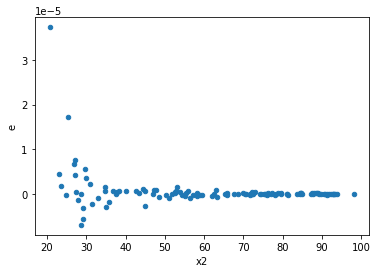

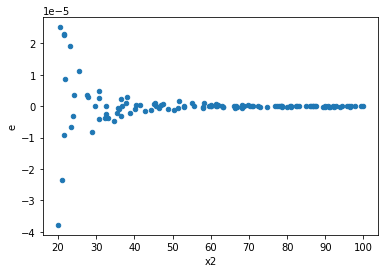

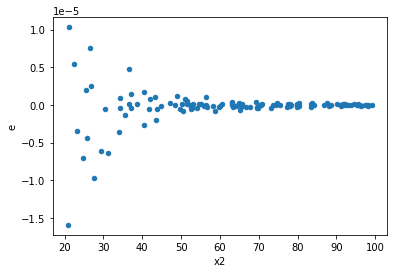

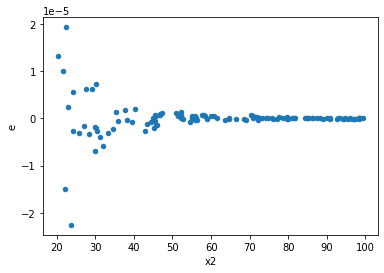

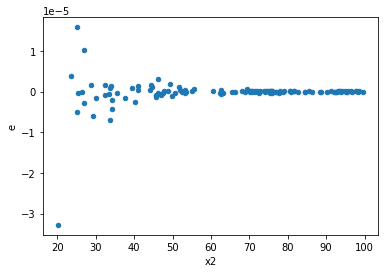

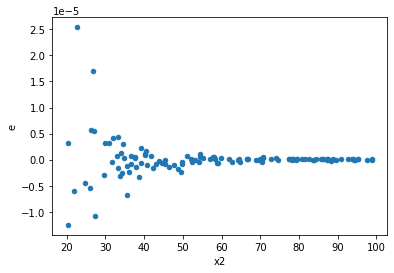

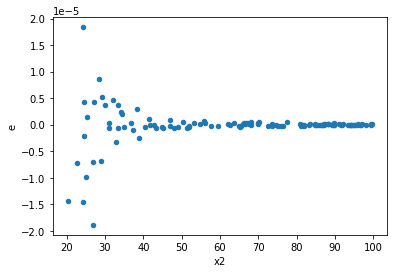

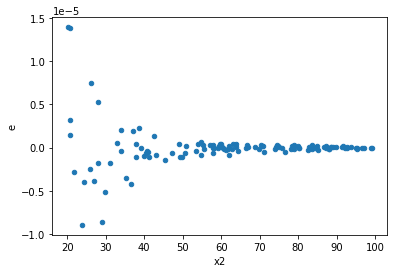

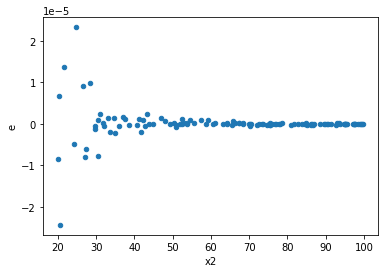

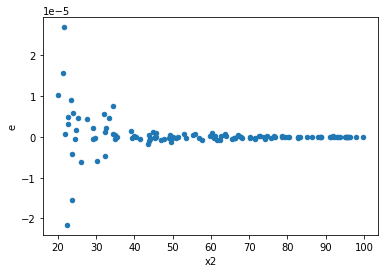

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,8.004581232935532e-13,1.6599384993836507e-09,1.8192230074853483e-14,3.7725874985992063e-11,0.0004822215543472063,9.622747421058307e-63,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,6.167985734821183e-13,4.322553641272202e-09,1.4018149397320869e-14,9.823985548345914e-11,0.0001426930987259151,1.2321626666381391e-74,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,7.99803197338473e-13,7.349888839589319e-10,1.8177345394056204e-14,1.6704292817248452e-11,0.0010881840729759424,8.408607280646226e-55,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,6.845704454835151e-13,1.675275760805783e-09,1.5558419215534435e-14,3.8074449109222344e-11,0.0004086314990639194,2.3259101903125836e-64,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,5.514669436365942e-13,1.5069266050341123e-09,1.2533339628104414e-14,3.4248331932593464e-11,0.0003659547464318016,1.9477844755526457e-65,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,8.842928360919896e-13,1.4508183022626112e-09,2.0097564456636127e-14,3.297314323324116e-11,0.0006095131517936453,1.8620400074535792e-60,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,7.856619670804351e-13,1.5059730964046732e-09,1.7855953797282616e-14,3.4226661281924394e-11,0.000521697212889199,5.641940760739806e-62,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,1.2356147031935098e-12,7.425908190939845e-10,2.8082152345307042e-14,1.6877064070317828e-11,0.0016639240230589584,1.1578885260241072e-50,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,5.20608761603e-13,1.737859431281198e-09,1.1832017309159091e-14,3.9496805256390864e-11,0.00029956897101809487,2.161947444498818e-67,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64